<a href="https://colab.research.google.com/github/bork0047/Data-Analysis/blob/main/Coursework_ComputerVision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Introduction and Research section of Coursework.

Name: Borislav Nikolaev Aleksandrov
Student number: 1906490

For this coursework, I have chosen a relevant Medical Research Article, extracted from a journal, written by:  Rohit Kundu, Ritacheta Das, Zong Woo Geem, Gi-Tae Han, Ram Sarkar published in 7th September 2021,  which to this point has over 30 000 views.  
The dataset analyzed in it is the same as the one I am analyzring in this Coursework.  

Technical dept, evaluation and presented methods:    

The Kermany dataset, consists of 5856 chest X-ray images from a large population of both adults and children, unevenly distributed among the classes "Pneumonia" and "Normal". The description of the images in the dataset can be seen in this table: https://journals.plos.org/plosone/article/figure/image?download&size=large&id=10.1371/journal.pone.0256630.t003  

To evaluate the proposed ensemble method on the two pneumonia datasets, four standard evaluation metrics were used: accuracy (Acc), precision (Pre), recall (Rec), and f1-score (F1).   

The presented method in the paper is the The GoogLeNet architecture, which is a 22-layer deep network consisting of “inception modules,” instead of uniformly progressive layers. To control the computational complexity, the GoogLeNet model uses inception blocks with dimension reduction, rather than the naive inception block. The proposed architecture which is GoogLeNet, thanks to the introduction of  inception block, improves the performance of artificial neural networks for computer vision tasks, such as the one in the shown article.  

As a conclusion of the paper presented, the proposed ensemble method outperformed popular ensemble schemes.   My goal in this coursework is to try to outperform the popular ensemble schemes, or atleast to achieve close to satisfying performance. I will be using data, exercises and labs, learned in univercity, implementing them and comparing them to the initial dataset in terms of performance.  

Ref of outperforming other popular ensemble schemes: https://journals.plos.org/plosone/article/figure/image?download&size=large&id=10.1371/journal.pone.0256630.t009   References: Article - https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0256630 Kermany Dataset - https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia RSNA Dataset - https://www.kaggle.com/c/rsna-pneumonia-detection-challenge (Althought in this Coursework, I am not analyzing the RSNA Dataset, I still cited it, hence it is a key point in comparing the datasets in the shown article.)

2. Research and Data Exploration :

In [ ]:
# import the required libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
from matplotlib.image import imread 
from PIL import Image
import tensorflow as tf
from tensorflow.keras import layers
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, AveragePooling2D,Flatten, Dense, Conv2D,MaxPool2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings('ignore')

Dataset was downloaded from Kaggle, downloaded and analyzed on local device, hence Google Collab had errors regarding it.

DS_Store was stopping me from running the dataset, as it was a folder in it, which would not allow analyzing.
I had to delete it manually in order to proceed and do the Coursework.

In [ ]:
pathOfData = "C:/Users/USER/Desktop/Coursework CV/chest_xray"
print(os.listdir(pathOfData))

['chest_xray', 'test', 'train', 'val', '__MACOSX']


In [ ]:
# path for train/ test and validate folders
train_folder_path = pathOfData + '/train/'
test_folder_path = pathOfData + '/test/'
val_folder_path = pathOfData + '/val/'

In [ ]:
labels = os.listdir(train_folder_path)
img_size = 112 # 
batch_size = 16
n_epochs = 25 
labels

['NORMAL', 'PNEUMONIA']

In [ ]:
#Assign train and test sets

train_n_path = train_folder_path+'/NORMAL/'
train_p_path = train_folder_path+'/PNEUMONIA/'

test_n_path = test_folder_path+'/NORMAL/'
test_p_path = test_folder_path+'/PNEUMONIA/'

Size of input images with proper discerption of training and testing sets provided:

In [ ]:
#Size of training images with proper discerption of training and testing sets provided

print(f'Number of normal images is {len(os.listdir(train_n_path))}') #length of normal training images
print(f'Number of postive images is {len(os.listdir(train_p_path))}') #length of pneumonia training images 
print(f'Total training images is  {len(os.listdir(train_n_path)) + len(os.listdir(train_p_path))}')

Number of normal images is 1341
Number of postive images is 3875
Total training images is  5216


In [ ]:
#Size of testing images with proper discerption of training and testing sets provided

print(f'Number of normal images is {len(os.listdir(test_n_path))}') 
print(f'Number of positive images is {len(os.listdir(test_p_path))}') 
print(f'Total training images is {len(os.listdir(test_n_path)) + len(os.listdir(test_p_path))}') 

Number of normal images is 234
Number of positive images is 390
Total training images is 624


In [ ]:
def get_training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [ ]:
#Assign the data to a list to train it
train = get_training_data(train_folder_path)

#Randomize the given data:
temp = np.random.permutation(train)

#Variable to hold the split ratio (4 to 1)
train_size = 0.8 

# Assigns 80% to training array and 20% to validation set
train, val = temp[:(int(train_size*len(temp)))], temp[int(train_size*len(temp)):]

In [ ]:
# Load the datasets 

test = get_training_data(test_folder_path)

In [ ]:
#Check the shape of the sets

print(f'The shape of the training set is {train.shape}') 
print(f'The shape of the test set is {test.shape}') 
print(f'The shape of the val set is {val.shape}') 

The shape of the training set is (4172, 2)
The shape of the test set is (624, 2)
The shape of the val set is (1044, 2)


In [ ]:
#Hence the matrices seem to 2 dimentional, it is good to know their types:
print(f'The type of the training set is {type(train)}')
print(f'The type of the training set is {type(test)}')
print(f'The type of the val set is {type(val)}')

The type of the training set is <class 'numpy.ndarray'>
The type of the training set is <class 'numpy.ndarray'>
The type of the val set is <class 'numpy.ndarray'>


All of the sets are of type numpy array. This will help with anazlying them.

In [ ]:

l = []
for i in train:
    if(i[1] == 0):
        l.append("Pneumonia")
    else:
        l.append("Normal")
sns.set_style('whitegrid')
sns.countplot(l) 



ValueError: could not convert string to float: 'Normal'

In [ ]:
# A function to show a number of chosen images as a subject to arguments passed

def show_sample_images (number, normal=True):
    plt.figure(figsize=(12,12))
    if normal == True:
        for n in range(number):
            normal_img = os.listdir(train_n_path)[n]
            normal_img_address = train_n_path+normal_img
            normal_load = Image.open(normal_img_address)
            ax = plt.subplot(int(number/2),int(number/2),n+1)
            plt.imshow(normal_load, cmap ='gray')
            plt.title("NORMAL")
    else:
        for n in range(number):
            pneumonia_img =  os.listdir(train_p_path)[n]
            pneumonia_img_address = train_p_path+pneumonia_img
            pneumonia_load = Image.open(pneumonia_img_address)
            
            #cast nrows to integer
            ax = plt.subplot(int(number/2),int(number/2),n+1)
            plt.imshow(pneumonia_load, cmap ='gray')
            plt.title("PNEUMONIA")
      
    plt.axis("off")   

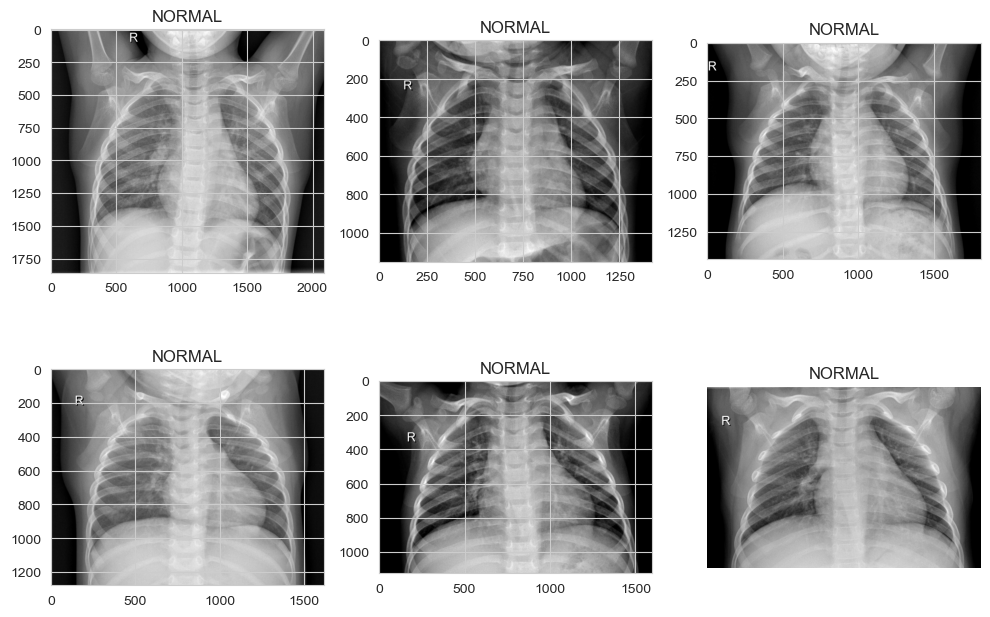

In [ ]:
#Show the normal images
numberImg= 6
show_sample_images(numberImg)

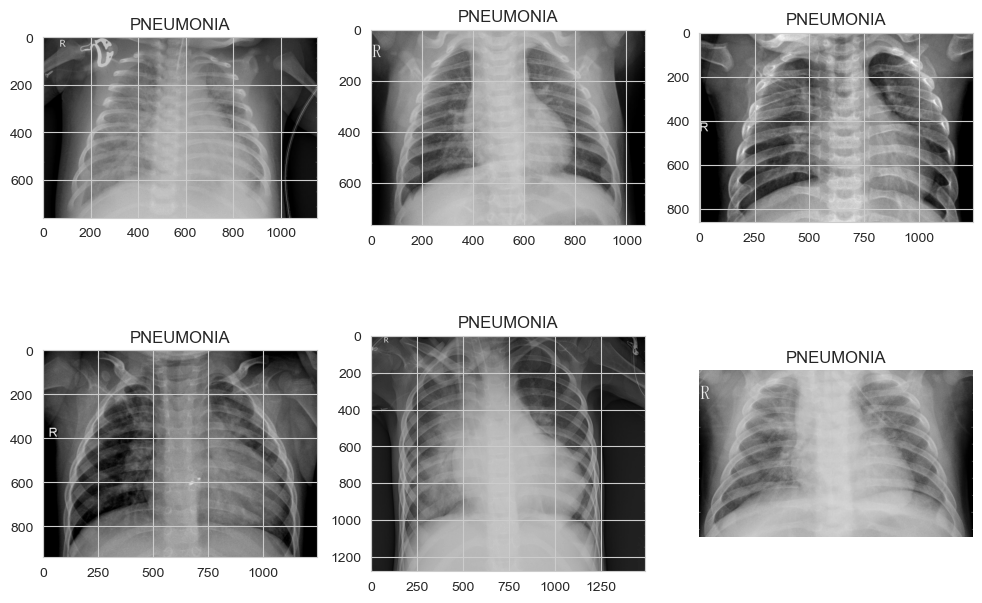

In [ ]:
#Show the pneumonia images for comparison
show_sample_images(6,False)

Apply hystogram equalization, which modifies the dynamic range and contrast of an image by altering that image such that its intensity histogram has a desired shape.

In [ ]:
from skimage import exposure

def equlize_hist_ (image):
  _image = np.asarray(image)
  image_eq = exposure.equalize_hist(_image)
  return image_eq


In [ ]:
def expose_image(Normal=True):
    if Normal==True:
        # Choose normal random image: generate random number between 1 and  the number of normal images in the training set
        random_img_ind= np.random.randint(0,len(os.listdir(train_n_path))) 
        # image file name 
        img_expose_name = os.listdir(train_n_path)[random_img_ind]

        # path to the image
        img_expose_address = train_n_path+img_expose_name

        # load mage 
        img_expose = Image.open(img_expose_address)
        img = np.asarray(img_expose)
        image_eq = equlize_hist_(img)
        figure1 = plt.figure(figsize= (16,16))
        img_1 = figure1.add_subplot(1,2,1)
        img_plot = plt.imshow(img, cmap = 'gray')
        img_1.set_title('Normal')
        plt.axis("off")

        img2 = figure1.add_subplot(1, 2, 2)
        img_plot = plt.imshow(image_eq, cmap = 'gray')
        img2.set_title('Normal after HE')
        plt.axis("off") 
    else:
        # Choose normal random image: generate random number between 1 and  the number of normal images in the training set
        random_img_ind= np.random.randint(0,len(os.listdir(train_p_path))) 
        # image file name 
        img_expose_name = os.listdir(train_p_path)[random_img_ind]

        # path to the image
        img_expose_address = train_p_path+img_expose_name

        # load mage 
        img_expose = Image.open(img_expose_address)
        img = np.asarray(img_expose)
        image_eq = equlize_hist_(img)
        figure1 = plt.figure(figsize= (16,16))
        img_1 = figure1.add_subplot(1,2,1)
        img_plot = plt.imshow(img, cmap = 'gray')
        img_1.set_title('Pneumonia')
        plt.axis("off")

        img2 = figure1.add_subplot(1, 2, 2)
        img_plot = plt.imshow(image_eq, cmap = 'gray')
        img2.set_title('Pneumonia after HE')
        plt.axis("off") 

       

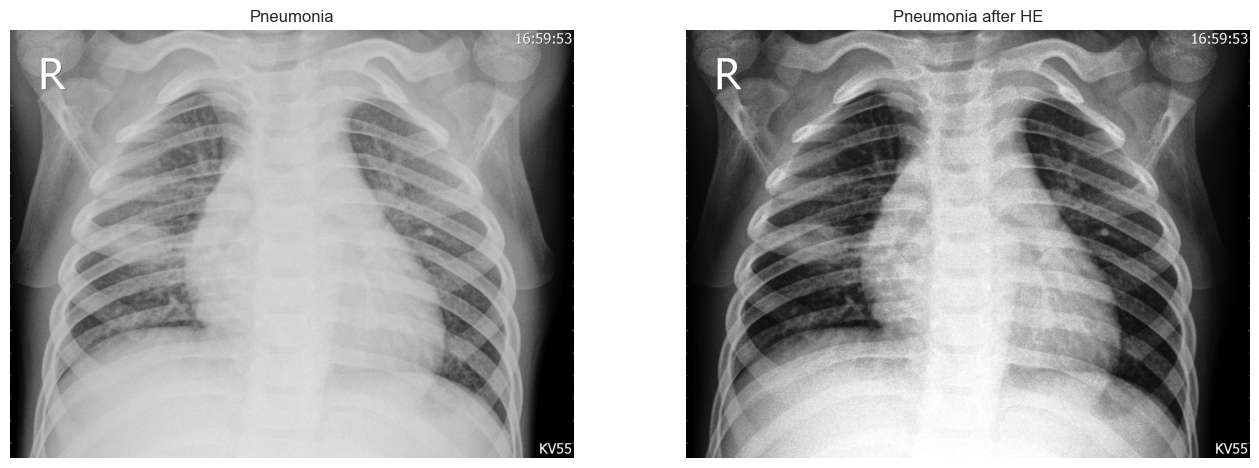

In [ ]:
# expose_image() will show random normal image
expose_image(False)

Another technique that proves to be effective on x-ray immages is the Adjust Gamma technique (Also known as Power Law Transform).

The technique transforms the overall brightness of the image to an optimal one, proving to be
especially effective on x-ray images.

This function transforms the input image pixelwise according to the
    equation ``O = I**gamma`` after scaling each pixel to the range 0 to 1.

In [ ]:
def adjust_gamma_ (image):
  _image = np.asarray(image)
  image_ag = exposure.adjust_gamma(_image)
  return image_ag

In [ ]:
def expose_image_ag(Normal=True):
    if Normal==True:
        # Choose normal random image: generate random number between 1 and  the number of normal images in the training set
        random_img_ind= np.random.randint(0,len(os.listdir(train_n_path))) 
        # image file name 
        img_expose_name = os.listdir(train_n_path)[random_img_ind]

        # path to the image
        img_expose_address = train_n_path+img_expose_name

        # load mage 
        img_expose = Image.open(img_expose_address)
        img = np.asarray(img_expose)
        image_ag = adjust_gamma_(img)
        figure1 = plt.figure(figsize= (16,16))
        img_1 = figure1.add_subplot(1,2,1)
        img_plot = plt.imshow(img, cmap = 'gray')
        img_1.set_title('Normal')
        plt.axis("off")

        img2 = figure1.add_subplot(1, 2, 2)
        img_plot = plt.imshow(image_ag, cmap = 'gray')
        img2.set_title('Normal after HE')
        plt.axis("off") 
    else:
        # Choose normal random image: generate random number between 1 and  the number of normal images in the training set
        random_img_ind= np.random.randint(0,len(os.listdir(train_p_path))) 
        # image file name 
        img_expose_name = os.listdir(train_p_path)[random_img_ind]

        # path to the image
        img_expose_address = train_p_path+img_expose_name

        # load mage 
        img_expose = Image.open(img_expose_address)
        img = np.asarray(img_expose)
        image_ag = adjust_gamma_(img)
        figure1 = plt.figure(figsize= (16,16))
        img_1 = figure1.add_subplot(1,2,1)
        img_plot = plt.imshow(img, cmap = 'gray')
        img_1.set_title('Pneumonia')
        plt.axis("off")

        img2 = figure1.add_subplot(1, 2, 2)
        img_plot = plt.imshow(image_ag, cmap = 'gray')
        img2.set_title('Pneumonia after AG')
        plt.axis("off") 


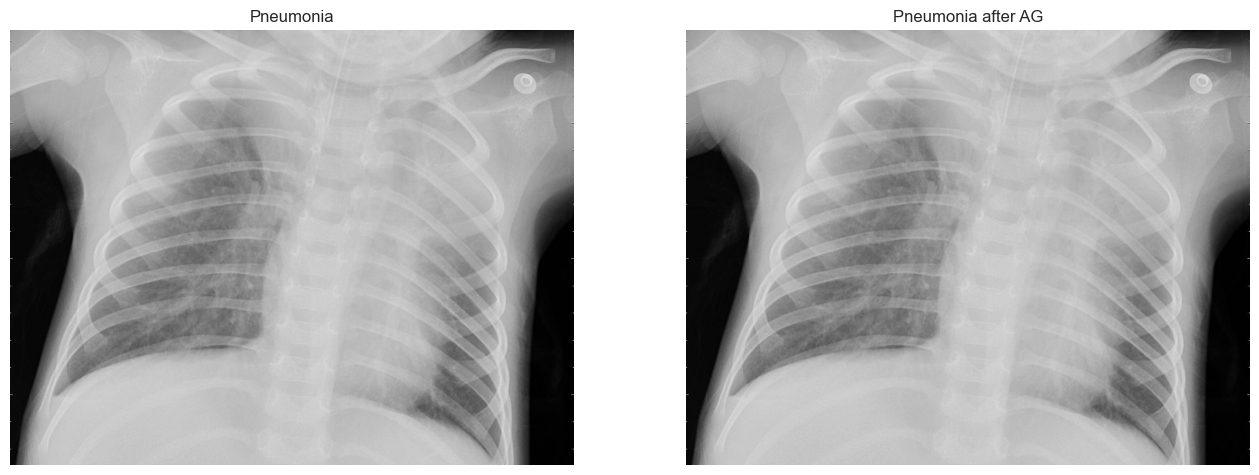

In [ ]:
# expose_image() will show random normal image
expose_image_ag(False)

Build CNN Model

In [ ]:
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)
    
for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

In [ ]:
print(f'Number of images in the training set is {len(x_train)}')

Number of images in the training set is 4172


In [ ]:
# Normalise the data 

x_train = np.array(x_train) / 255.0
x_val = np.array(x_val) / 255.0
x_test = np.array(x_test) / 255.0

In [ ]:
# resize data for deep learning - img_size above is set to 244 by 244

x_train = x_train.reshape(-1, img_size, img_size, 3)
y_train = np.array(y_train)

x_val = x_val.reshape(-1, img_size, img_size, 3)
y_val = np.array(y_val)

x_test = x_test.reshape(-1, img_size, img_size, 3)
y_test = np.array(y_test)

Another technique to implement the performance of the model, which I will try to implement later on in the VGG16 pre-trained model:

In [ ]:
#data augmentation help improve the performance of the model by generating more data 
#via applying a geometric transformation to existing data/ images.

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

datagen = ImageDataGenerator(

      featurewise_center=False, 
      samplewise_center=False, 
      featurewise_std_normalization=False, 
      samplewise_std_normalization=False, 
      zca_whitening=False, 
      rotation_range = 30, 
      zoom_range = 0.2, 
      
      width_shift_range = 0.1, 
      height_shift_range = 0.1, 
      horizontal_flip = True, 
      vertical_flip=False) 






3. Baseline Model :

In this section, the CNN model is made.

A Convolutional Neural Network is a specific type of an AI implementation which uses a mathematical matrix manipulation called the convolution operation to process data from the images. It does that by multiplying two matrices and yielding a third, smaller matrix. 

Noticable some parts have been commented in the Model Setup, as Batch Normalization (BN) and Dropout layers are added.

The Batch Normalization layer:
BN layer is more than essential in training, hence adding BN layers allows us to use higher learning rate (LR) without compromising convergence. It improves from minimum of 5 times faster performance, as cited by the reference link (https://towardsdatascience.com/batch-normalization-in-3-levels-of-understanding-14c2da90a338#6cd2) - The authors of the paper have successfully trained their Inception-with-BN network using a 30 times higher learning rate than the original one.

There are some flaws to this layer, however.
Hence BN relies on batch first and second statistical moments (mean and variance) to normalize hidden layers activations. The output values are then strongly tied to the current batch statistics. Such transformation adds some noise, depending on the input examples used in the current batch, which all by itself makes a 'regularization' effect, which might induce some unexpected behavior from a network.

The Droput layer: is used to prevent overfitting of the model. It does this by setting some input units to 0 during the training process (e.g. switching off some neurons in the network)
Ref: https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout

Batch size of the model matters, as it defines the number of samples we use in one epoch to train a neural network and therefore affects the learning rate, overall training time, training time per epoch, quality of the model and more. 
Ref: https://www.baeldung.com/cs/learning-rate-batch-size

In [ ]:
# Model setup
model = Sequential()
model.add(Conv2D(32, (3,3), strides = 1, padding = 'same', activation = 'relu', input_shape = (img_size, img_size, 3)))

# Adding Batch Normalization to improve model training time and make it more stable

model.add(BatchNormalization())
model.add(MaxPool2D((2,2), strides = 2, padding = 'same'))
model.add(Conv2D(64, (3,3), strides = 1, padding = 'same', activation = 'relu', input_shape = (img_size, img_size, 3)))

# The Droput layer: is used to prevent overfitting of the model. 
# It does this by setting some input units to 0 during the training process

model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2), strides = 2, padding = 'same'))
model.add(Conv2D(64, (3,3), strides = 1, padding = 'same', activation = 'relu', input_shape = (img_size, img_size, 3)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2), strides = 2, padding = 'same'))
model.add(Conv2D(128, (3,3), strides = 1, padding = 'same', activation = 'relu', input_shape = (img_size, img_size, 3)))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2), strides = 2, padding = 'same'))
model.add(Conv2D(256, (3,3), strides = 1, padding = 'same', activation = 'relu', input_shape = (img_size, img_size, 3)))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2), strides = 2, padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1, activation = 'sigmoid'))

model.compile(
              optimizer = 'rmsprop', loss = 'binary_crossentropy', 
              metrics = ['accuracy']
              )

In [ ]:
# model summary (see the number of trainable parameters)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 112, 112, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 112, 112, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 56, 56, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 56, 56, 64)        18496     
                                                                 
 dropout (Dropout)           (None, 56, 56, 64)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 56, 56, 64)       2

As every model, there is a risk of class imbalance in the dataset. Luckily there is a way to prevent that
by adjusting the weights, thanks to a parameter provided by Image Data Generator. 
The simpliest way to put it is that I would want to have the classifier heavily weight the few examples that are available. 
I can do this by passing Keras weights for each class through a parameter. These will cause the model to "pay more attention" to examples from an under-represented class, such as our two classes.

There is a simple formula I follow to increase the weight of both classes.

The formula goes: 
weight0 = (1/Neg)*(total/2)
weight1 = (1/Pos)*(total/2)

In [ ]:
total = len(os.listdir(train_n_path)) + len(os.listdir(train_p_path))
neg = len(os.listdir(train_n_path))
pos = len(os.listdir(train_p_path))

weight_for_0 = 1 /neg * (total/2.0)
weight_for_1 = 1/pos *(total/2.0)

class_weight = {0: weight_for_0, 1: weight_for_1}
class_weight

{0: 1.9448173005219984, 1: 0.6730322580645162}

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_accuracy', patience = 2, verbose = 1, factor = 0.3, min_lr = 0.000001)

In [ ]:
# Start training the model
history = model.fit(datagen.flow(x_train, y_train, batch_size = batch_size), 
                    epochs = n_epochs, validation_data = datagen.flow(x_val, y_val), 
                    callbacks = [learning_rate_reduction], class_weight = class_weight)

Epoch 1/25
261/261 [==============================] - 39s 85ms/step - loss: 0.5645 - accuracy: 0.8188 - val_loss: 23.3472 - val_accuracy: 0.7452 - lr: 0.0010
Epoch 2/25
261/261 [==============================] - 57s 220ms/step - loss: 0.3519 - accuracy: 0.8670 - val_loss: 0.8081 - val_accuracy: 0.8458 - lr: 0.0010
Epoch 3/25
261/261 [==============================] - 79s 304ms/step - loss: 0.2896 - accuracy: 0.8965 - val_loss: 0.6377 - val_accuracy: 0.6370 - lr: 0.0010
Epoch 4/25
261/261 [==============================] - 69s 264ms/step - loss: 0.2875 - accuracy: 0.9003 - val_loss: 0.2307 - val_accuracy: 0.9272 - lr: 0.0010
Epoch 5/25
261/261 [==============================] - 96s 369ms/step - loss: 0.2647 - accuracy: 0.9116 - val_loss: 0.3167 - val_accuracy: 0.9061 - lr: 0.0010
Epoch 6/25
261/261 [==============================] - 64s 243ms/step - loss: 0.2617 - accuracy: 0.9166 - val_loss: 0.1688 - val_accuracy: 0.9416 - lr: 0.0010
Epoch 7/25
261/261 [==============================] 

<Axes: >

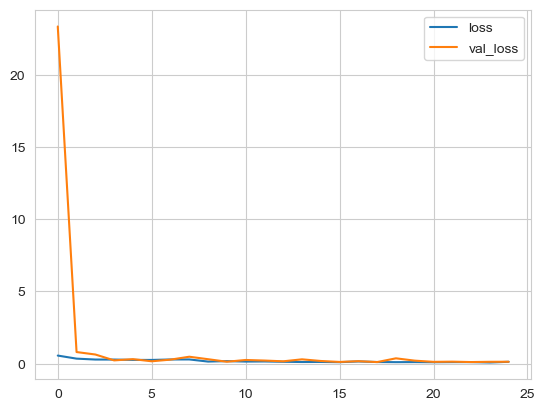

In [ ]:
# Analyze the losses of the model

losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot()

The loss is very important for any model, as it measures how well the neural network models the training data.
More information about the loss function can be found here: Ref - https://towardsdatascience.com/loss-functions-and-their-use-in-neural-networks-a470e703f1e9. 

<Axes: >

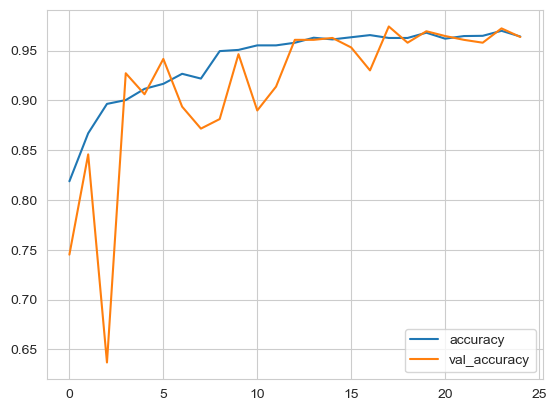

In [ ]:
losses[['accuracy','val_accuracy']].plot()

It appears that throughout running, the model had one extreme loss, which spiked up to 10, affecting the accuracy down to 0.65 on this one instance. Even with that, the models proves to be quite effective in terms of accuracy, as it goes up to an overall of 95%. I will try some other techniques to increase that.

In [ ]:
# Checking the test accuracy of the model

print("Loss of the model is - " , model.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

20/20 [==============================] - 3s 146ms/step - loss: 0.3069 - accuracy: 0.9167
Loss of the model is -  0.3069344162940979
20/20 [==============================] - 2s 105ms/step - loss: 0.3069 - accuracy: 0.9167
Accuracy of the model is -  91.66666865348816 %


In [ ]:
#Saving the model and making predictions:

from tensorflow.keras.models import load_model
model.save('CNN_PNEUMONIA.h5') # 

##cnn_model = load_model("./CNN_PNEUMONIA.h5")
predictions=model.predict(x_test) 

pred_labels= np.where(predictions>0.5, 1, 0)

20/20 [==============================] - 1s 20ms/step


The summary of prediction results on a classification problem, i.e. Confusion Metrix can be reported with the help of the corresponding libraries.

Reference:

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html



In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, pred_labels, target_names = ['Pneumonia (Class 0)','Normal (Class 1)']))

                     precision    recall  f1-score   support

Pneumonia (Class 0)       0.91      0.86      0.89       234
   Normal (Class 1)       0.92      0.95      0.93       390

           accuracy                           0.92       624
          macro avg       0.92      0.91      0.91       624
       weighted avg       0.92      0.92      0.92       624



<Axes: >

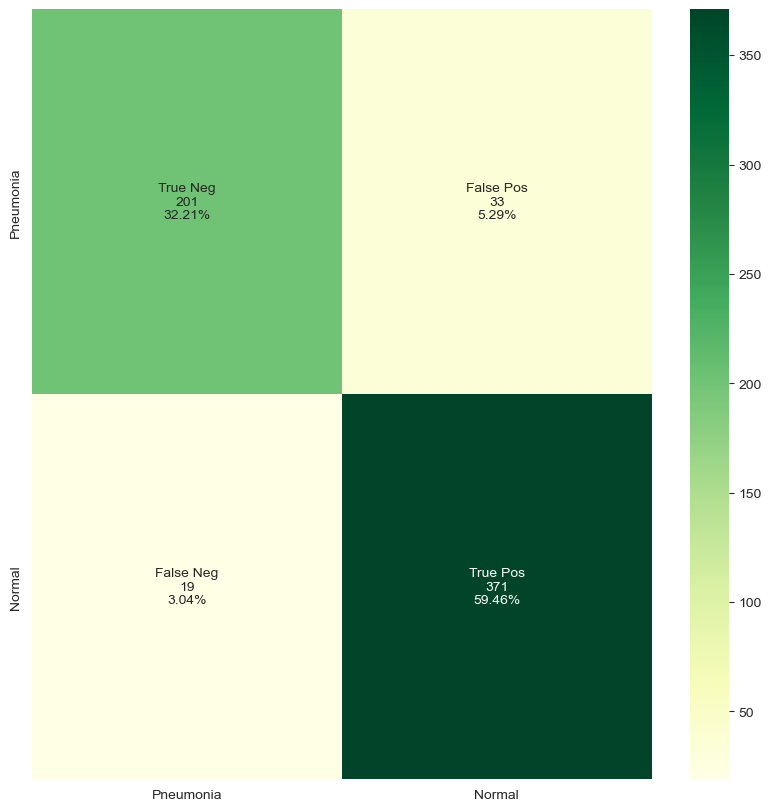

In [ ]:
# Plotting the results:

cf_matrix = confusion_matrix(y_test, pred_labels)
plt.figure(figsize = (10,10))
classes = ['Pneumonia','Normal']
labels = ['TN','FP','FN','TP']
labels = np.asarray(labels).reshape(2,2)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap= "YlGn" ,
            xticklabels = classes,yticklabels = classes
           )

In [ ]:
# store class labels and predictions in a dataframe

results = pd.DataFrame({'Actual':y_test,'Predicted':pred_labels.flatten()})

incorrect_df = results[results.Actual!=results.Predicted]
incorrect_df.head()

,Actual,Predicted
16,0,1
61,0,1
85,0,1
89,0,1
104,0,1


In [ ]:
# manual calculation of of results 
print(f'Accuracy in percentage is {round((results.shape[0]-incorrect_df.shape[0])/results.shape[0],2)*100} %')

Accuracy in percentage is 92.0 %


It appears that the accuracy of this model is 92%, which seems more than amazing, however I will try to improve that further.

In [ ]:
#picture examples of the accuracy
correct = np.nonzero(pred_labels == y_test)[0]
incorrect = np.nonzero(pred_labels != y_test)[0]

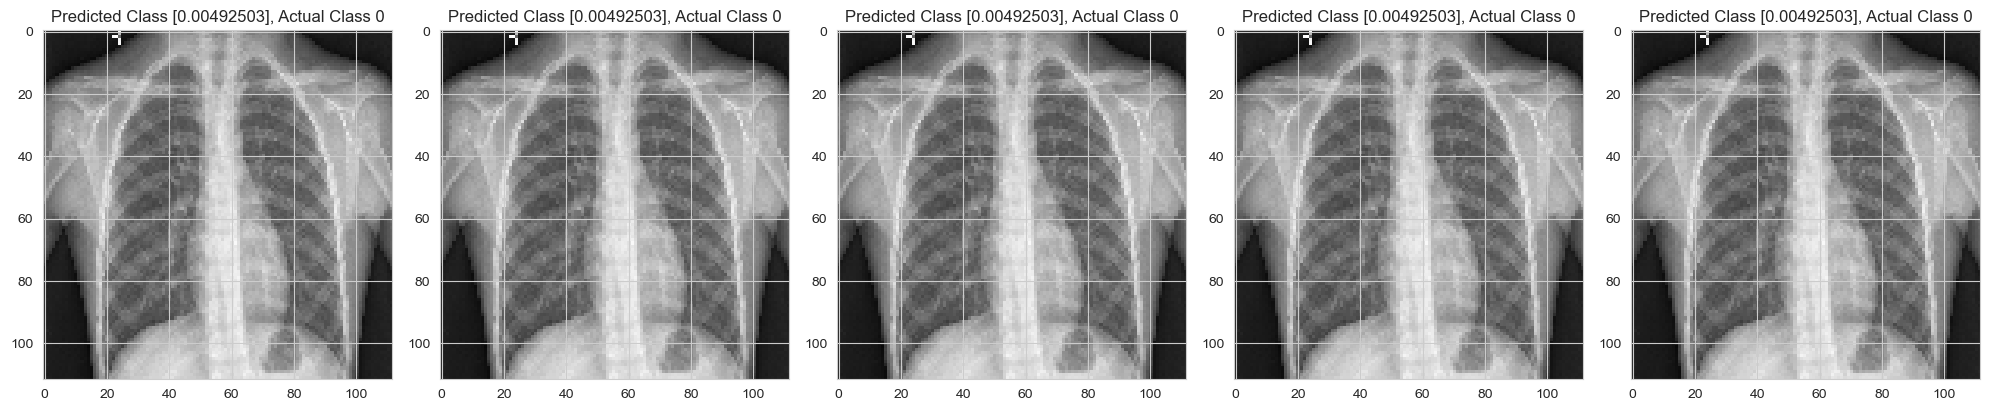

In [ ]:
i = 0
figure = plt.figure(figsize= (20,20))
for c in correct[:5]:
    ax = plt.subplot(5,5,i+1)
    plt.imshow(x_test[c].reshape(img_size,img_size,3), cmap="gray", interpolation='none')
    plt.title("Predicted Class {}, Actual Class {}".format(predictions[c], y_test[c]))
    plt.tight_layout()
    i += 1

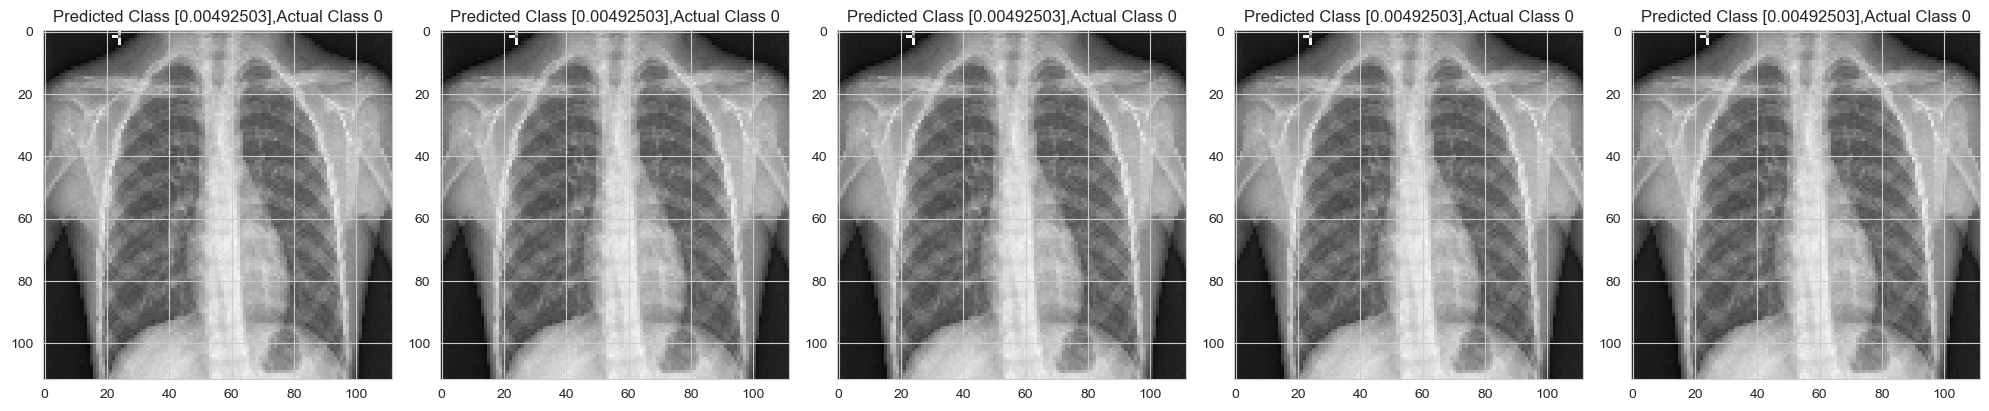

In [ ]:
i = 0
figure = plt.figure(figsize= (20,20))
for c in incorrect[:5]:
    ax = plt.subplot(5,5,i+1)
    plt.imshow(x_test[c].reshape(img_size,img_size,3), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predictions[c], y_test[c]))
    plt.tight_layout()
    i += 1

4. Solution Improvement:

Apply Transfer Learning

For this part, I will be using ResNet50V2 and VGG16, as two different pre-trained models are needed on this section.

ResNet50V2 by itself is a modified version of ResNet50 that performs better than ResNet50 and ResNet101 on the ImageNet dataset. In ResNet50V2, a modification was made in the propagation formulation of the connections between blocks. ResNet50V2 also achieves a good result on the ImageNet dataset. https://www.sciencedirect.com/science/article/pii/S2352914820302537
Model performance improved proof by this paper: https://link.springer.com/article/10.1007/s11063-022-11060-9

Proof of improving performance of VGG16 can be seen here: https://www.kaggle.com/code/viratkothari/chest-x-ray-image-classification-using-vgg16

In [ ]:
from keras.applications.inception_v3 import InceptionV3

In [ ]:
tf.keras.backend.clear_session()

#This will download the weights of ResNet
base_model = tf.keras.applications.ResNet152V2(
    weights='imagenet',
    input_shape=(img_size, img_size, 3),
    include_top=False)

# freeze the layers
base_model.trainable = False

In [ ]:
def get_pretrained():
    
    #Input shape = [width, height, color channels]
    inputs = layers.Input(shape=(img_size,img_size, 3))
    
    x = base_model(inputs)

    # Head
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.1)(x)
    
    #Final Layer (Output)
    output = layers.Dense(1, activation='sigmoid')(x)
    
    model = tf.keras.Model(inputs=[inputs], outputs=output)
    
    return model

On this new model, I will be using the Adam optimizer, as it is a newer and overall better optimizer in comparison with its predecessors. Before Adam, many adaptive optimization techniques were introduced such as AdaGrad, RMSP which have good performance over SGD but in some cases have some disadvantages such as generalizing performance which is worse than that of the SGD in some cases. Released on 2014, Adam was introduced which is better in terms of generalizing performance. Also in Adam, the hyperparameters have intuitive interpretations and hence required less tuning.

Reference: https://optimization.cbe.cornell.edu/index.php?title=Adam

In [ ]:
model_pretrained = get_pretrained()
model_pretrained.compile(loss='binary_crossentropy'
              , optimizer = tf.keras.optimizers.Adam(learning_rate=0.00005), metrics='binary_accuracy')

model_pretrained.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 112, 112, 3)]     0         
                                                                 
 resnet152v2 (Functional)    (None, 4, 4, 2048)        58331648  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                             

In [ ]:
history_tl = model_pretrained.fit(datagen.flow(x_train,y_train, batch_size = batch_size) ,
                    epochs = n_epochs , validation_data = datagen.flow(x_val, y_val) ,
                    callbacks = [learning_rate_reduction],
                    steps_per_epoch = x_train.shape[0]/batch_size,
                    class_weight = class_weight
                   )

Epoch 1/25
260/260 [==============================] - 239s 918ms/step - loss: 0.2484 - binary_accuracy: 0.9020 - val_loss: 0.2179 - val_binary_accuracy: 0.9148 - lr: 5.0000e-05
Epoch 2/25
260/260 [==============================] - 242s 927ms/step - loss: 0.2464 - binary_accuracy: 0.8953 - val_loss: 0.2496 - val_binary_accuracy: 0.8975 - lr: 5.0000e-05
Epoch 3/25
260/260 [==============================] - 185s 708ms/step - loss: 0.2261 - binary_accuracy: 0.9063 - val_loss: 0.2083 - val_binary_accuracy: 0.9090 - lr: 5.0000e-05
Epoch 4/25
260/260 [==============================] - 100s 384ms/step - loss: 0.2188 - binary_accuracy: 0.9082 - val_loss: 0.1941 - val_binary_accuracy: 0.9186 - lr: 5.0000e-05
Epoch 5/25
260/260 [==============================] - 155s 596ms/step - loss: 0.2133 - binary_accuracy: 0.9137 - val_loss: 0.2326 - val_binary_accuracy: 0.9023 - lr: 5.0000e-05
Epoch 6/25
260/260 [==============================] - 246s 943ms/step - loss: 0.2086 - binary_accuracy: 0.9140 - va

Checking the results, which seem to be slightly lower than the previous experiment.

<Axes: >

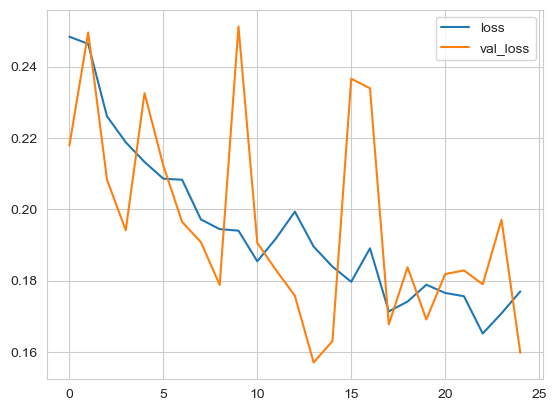

In [ ]:
#Comparisson
losses = pd.DataFrame(model_pretrained.history.history)
losses[['loss','val_loss']].plot()

<Axes: >

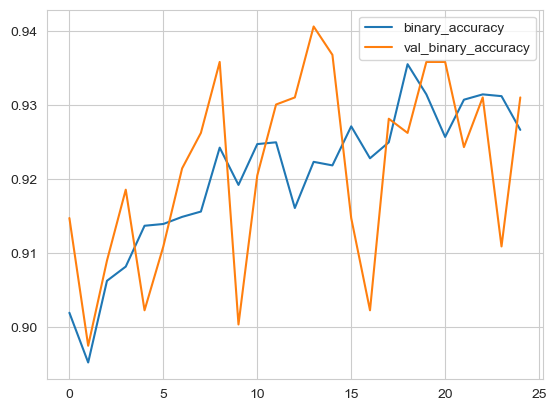

In [ ]:
losses[['binary_accuracy','val_binary_accuracy']].plot()

In [ ]:
print("Loss of the model is - " , model_pretrained.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , model_pretrained.evaluate(x_test,y_test)[1]*100 , "%")

20/20 [==============================] - 20s 959ms/step - loss: 0.2810 - binary_accuracy: 0.9022
Loss of the model is -  0.280976802110672
20/20 [==============================] - 28s 1s/step - loss: 0.2810 - binary_accuracy: 0.9022
Accuracy of the model is -  90.22436141967773 %


In [ ]:
predictions = model_pretrained.predict(x_test)
pred_labels= np.where(predictions>0.5, 1, 0)

20/20 [==============================] - 51s 2s/step


<Axes: >

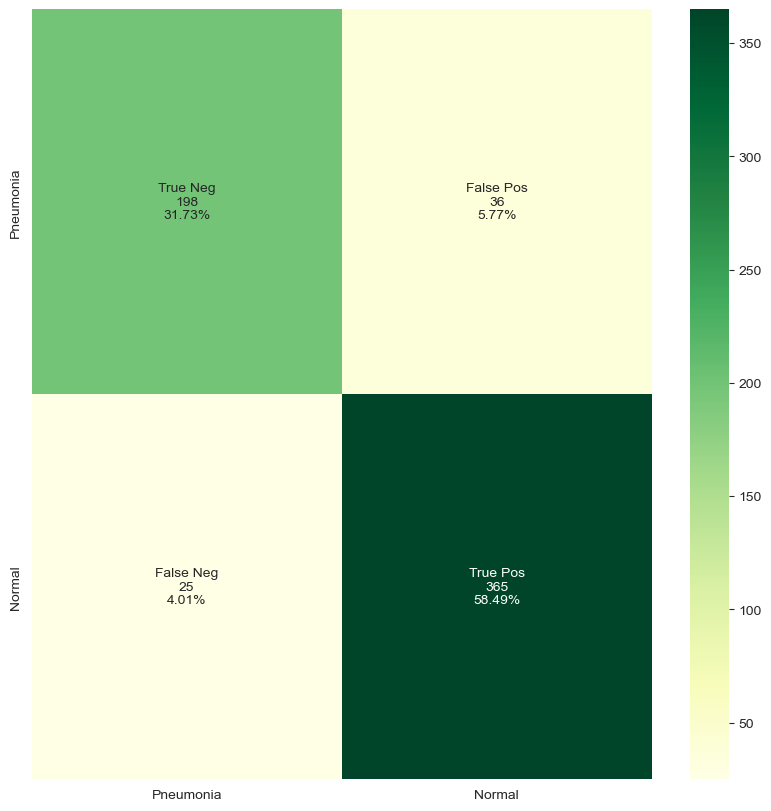

In [ ]:
cf_matrix = confusion_matrix(y_test, pred_labels)
plt.figure(figsize = (10,10))

labels = ['TN','FP','FN','TP']
labels = np.asarray(labels).reshape(2,2)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap= "YlGn",
           xticklabels = classes,yticklabels = classes)

In [ ]:
cf_matrix

array([[198,  36],
       [ 25, 365]], dtype=int64)

Fine-Tuning: Unfreeze a few of the top layers of a frozen model base and jointly train both the newly-added classifier layers and the last layers of the base model. This allows me to "fine-tune" the higher-order feature representations in the base model in order to make them more relevant for the specific task. The main problem I had with this part of the task is the computation cost increase, thanks to the unfrozen layers, therefore crashing and giving errors.

In [ ]:
#Fine tunning 
base_model.trainable = True

# Retrain the last 10 layers (all lower layers will be kept frozen)
for layer in base_model.layers[:-10]:
    layer.trainable = False

In [ ]:
model_pretrained.compile(loss='binary_crossentropy'
              , optimizer = tf.keras.optimizers.Adam(learning_rate=0.000002), metrics='binary_accuracy')

model_pretrained.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 112, 112, 3)]     0         
                                                                 
 resnet152v2 (Functional)    (None, 4, 4, 2048)        58331648  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                             

In [ ]:
history_ft = model_pretrained.fit(datagen.flow(x_train,y_train, batch_size = batch_size) ,
                    epochs = n_epochs , validation_data = datagen.flow(x_val, y_val) ,
                    callbacks = [learning_rate_reduction],
                    steps_per_epoch = x_train.shape[0]/batch_size,
                    class_weight = class_weight
                   )

Epoch 1/25


TypeError: 'NoneType' object is not callable

Evaluate my model by extracting metrics, storing them in a pandas dataframe and reshape it for visualising results.
Compare against the baseline model and the results reported in the paper I have chosen.

And basically repeat the functions that have already been used.

In [ ]:
print("Loss of the model is - " , model_pretrained.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , model_pretrained.evaluate(x_test,y_test)[1]*100 , "%")

20/20 [==============================] - 3s 154ms/step - loss: 0.2524 - binary_accuracy: 0.9087
Loss of the model is -  0.25243115425109863
20/20 [==============================] - 3s 159ms/step - loss: 0.2524 - binary_accuracy: 0.9087
Accuracy of the model is -  90.86538553237915 %


In [ ]:
# Predict
predictions = model_pretrained.predict(x_test)
pred_labels= np.where(predictions>0.5, 1, 0)

20/20 [==============================] - 3s 171ms/step


<Axes: >

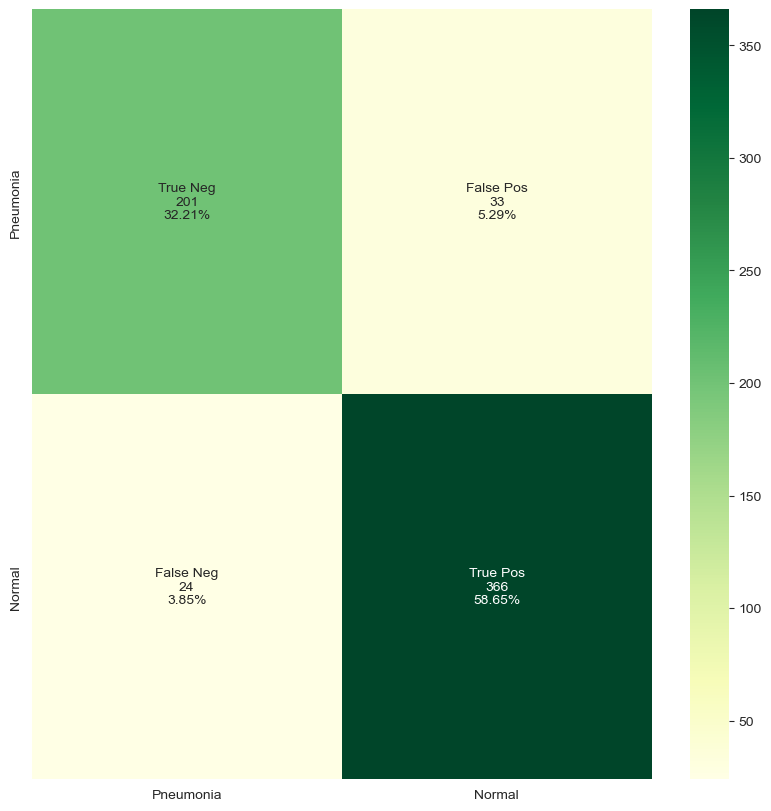

In [ ]:
# Show the confusion matrix
cf_matrix = confusion_matrix(y_test, pred_labels)
plt.figure(figsize = (10,10))

labels = ['TN','FP','FN','TP']
labels = np.asarray(labels).reshape(2,2)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap= "YlGn",
           xticklabels = classes,yticklabels = classes)

Second model:
Repeating the same as the ResNet one, but using VGG16

In [ ]:
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import VGG16

I tried to use ImageDataGenerator, but the model overall gives less accuracy, making it not that efficient in those terms, again the reference paper for the VGG16 and ImageDataGenerator is here: https://www.kaggle.com/code/viratkothari/chest-x-ray-image-classification-using-vgg16

In [ ]:
tf.keras.backend.clear_session()

# Needs to download from library the first time it runs
base_model2 = tf.keras.applications.VGG16(
    weights='imagenet',
    input_shape=(img_size, img_size, 3),
    include_top=False)
# freeze the layers
base_model2.trainable = False

58889256/58889256 [==============================] - 25s 0us/step


In [ ]:
def get_pretrained2():
    
    #Input shape = [width, height, color channels]
    inputs = layers.Input(shape=(img_size,img_size, 3))
    
    x = base_model2(inputs)

    # Head
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.1)(x)
    
    #Final Layer (Output)
    output = layers.Dense(1, activation='sigmoid')(x)
    
    model = tf.keras.Model(inputs=[inputs], outputs=output)
    
    return model

In [ ]:
model_pretrained2 = get_pretrained()
# Using Adam aptimizer again for better comparison of both pretrained models
model_pretrained2.compile(loss='binary_crossentropy'
              , optimizer = tf.keras.optimizers.Adam(learning_rate=0.00005), metrics='binary_accuracy')

model_pretrained2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 112, 112, 3)]     0         
                                                                 
 resnet152v2 (Functional)    (None, 4, 4, 2048)        58331648  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                             

In [ ]:
history_tl2 = model_pretrained2.fit(datagen.flow(x_train,y_train, batch_size = batch_size) ,
                    epochs = n_epochs , validation_data = datagen.flow(x_val, y_val) ,
                    callbacks = [learning_rate_reduction],
                    steps_per_epoch = x_train.shape[0]/batch_size,
                    class_weight = class_weight
                   )

Epoch 1/25
260/260 [==============================] - 213s 150ms/step - loss: 0.2169 - binary_accuracy: 0.9142 - val_loss: 0.1401 - val_binary_accuracy: 0.9473 - lr: 5.0000e-05
Epoch 2/25
260/260 [==============================] - 48s 182ms/step - loss: 0.1522 - binary_accuracy: 0.9331 - val_loss: 0.1392 - val_binary_accuracy: 0.9435 - lr: 5.0000e-05
Epoch 3/25
260/260 [==============================] - 77s 294ms/step - loss: 0.1327 - binary_accuracy: 0.9470 - val_loss: 0.1510 - val_binary_accuracy: 0.9531 - lr: 5.0000e-05
Epoch 4/25
260/260 [==============================] - 78s 300ms/step - loss: 0.1285 - binary_accuracy: 0.9475 - val_loss: 0.1245 - val_binary_accuracy: 0.9511 - lr: 5.0000e-05
Epoch 5/25
260/260 [==============================] - 100s 383ms/step - loss: 0.1189 - binary_accuracy: 0.9545 - val_loss: 0.1360 - val_binary_accuracy: 0.9473 - lr: 5.0000e-05
Epoch 6/25
260/260 [==============================] - 110s 424ms/step - loss: 0.1247 - binary_accuracy: 0.9513 - val_l

In [ ]:
# Checking the losses
losses2 = pd.DataFrame(model_pretrained2.history.history)
losses2[['loss','val_loss']].plot()

In [ ]:
losses2[['binary_accuracy','val_binary_accuracy']].plot()


In [ ]:
print("Loss of the model is - " , model_pretrained.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , model_pretrained.evaluate(x_test,y_test)[1]*100 , "%")

In [ ]:
predictions2 = model_pretrained2.predict(x_test)
pred_labels2= np.where(predictions2>0.5, 1, 0)

5. Conclusion and Future Direction :

In conclusion, the paper that I have chosen, has much better results compared to general techniques. In comparison, this experiment's reason was to get as close as possible to the paper's outstanding 98.81% accuracy and I believe that with enough CPU power, and more research on implementing it, it is entirely achievable. The main problem in my case were the unfrozen layers, as they overwhelmed my RAM and I was unable to continue, without crashes.

Overall my biggest accuracy was around 92%, which compared to a faster CPU with more time for analysis and more knowledge, could have gotten up to 97%, as I have researched more implementation papers. I tried using the ImageDataGenerator, but gave up on it, as it gave lower accuracy for more computational power, which seems unpractical. The results in the chosen paper are more than outstanding, however I have noticed some flaws.

As stated by the chosen paper, some instances of the ensemble framework failed to produce correct predictions. In my experience with this case, I could say that wuth a more powerful CPU and some simple image enchancing techniques such as contrast enhancement or data standardisation, could improve image quality and reduce the chance of incorrect predictions. 
As previously stated, hence 3 CNN models are needed, the computatuonal cost is very expensive, which could be improved with techniques such as snapshot ensembling or batch normalisationm - used in my currenct example. 

As a final statement, the proposed paper has an amazing accuracy of 98.81%, which my current program could not achieve, with a 92% accuracy in the price of fixing the problems of the proposed journal, reducing the risk of unnacurate predictions and minimizing the CPU cost using studied techniques.